# Basics of Pandas

Adopted from http://pandas.pydata.org/pandas-docs/version/0.15.2/10min.html

In [100]:
#quick ref: list of operations that you usually perform on data:

# define
data=pd.DataFrame(np.ones((5,3)),columns=['A','B','C'])
data['id']=data.index
data['new']=np.random.choice(range(1, 6), len(data))
data['sum']=data.sum(axis=1)


#aggregate
data.groupby(['A','B'])['C','new'].mean()

f = {'C':['sum','mean'], 'new':['prod']}
data.groupby(['A','B']).agg(f)


#transpose - restructure
data1= pd.melt(data, id_vars=['id'], value_vars=['B', 'new'])
data1.pivot(index='id', columns='variable', values='value')


#in-and output
data=pd.read_csv(r'C:\file name.txt')
data=pd.read_excel('C:\\file name.xls')
data=pd.read_clipboard()


#joining
data.join(data,on='id',how='inner',lsuffix='l_')


#statistics
data.describe()


#plotting
%matplotlib inline
data.plot()
data.hist()


#type conversion
data['A']=data['A'].astype(str)
data.dtypes


#select
data[(data['id']>1) & (data['id']<3)]
# data[(data['id']>1) and (data['id']<3)]  ! not working


#cleaning data
#data[(data['id']>1) & (data['id']<3),['B','C']] = np.nan  not working
data.ix[(data['id']>1) & (data['id']<3),['B','C']] = np.nan  

data.fillna(data.mean())

,A,B,C,id,new,sum
0,1.0,1,1,0,4,7
1,1.0,1,1,1,4,8
2,1.0,1,1,2,1,6
3,1.0,1,1,3,5,11
4,1.0,1,1,4,5,12


In [2]:
import pandas as pd
import numpy as np

## Object Creation

In [3]:
s = pd.Series([1,3,5,np.nan,6,8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [4]:
# Creating a DataFrame by passing a numpy array, with a datetime index and labeled columns.
dates = pd.date_range('20130101',periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [11]:
df.columns[1:3]

Index(['B', 'C'], dtype='object')

In [5]:
df = pd.DataFrame(np.random.randn(6,4),index=dates,columns=list('ABCD'))
df

,A,B,C,D
2013-01-01,1.037328,0.186397,-0.577339,1.161401
2013-01-02,0.006365,2.012248,0.289567,0.862473
2013-01-03,0.915050,0.643984,-0.562894,2.042129
2013-01-04,1.905215,-0.454482,-1.140033,0.510213
2013-01-05,1.279382,-0.422253,1.087482,1.168430
2013-01-06,-0.500374,1.383299,-1.522657,-0.245271


In [6]:
# Creating a DataFrame by passing a dict of objects that can be converted to series-like.
df2 = pd.DataFrame({ 'A' : 1.,
   ...:              'B' : pd.Timestamp('20130102'),
   ...:              'C' : pd.Series(1,index=range(4),dtype='float32'),
   ...:              'D' : np.array([3] * 4,dtype='int32'),
   ...:              'E' : 'foo' })
   ...: 
df2

SyntaxError: invalid syntax (<ipython-input-6-44b15830d306>, line 3)

In [235]:
# Having specific dtypes
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E            object
dtype: object

In [ ]:
# If you’re using IPython, tab completion for column names (as well as public attributes) is automatically enabled. Here’s a subset of the attributes that will be completed:

In [13]: df2.<TAB>
df2.A                  df2.boxplot
df2.abs                df2.C
df2.add                df2.clip
df2.add_prefix         df2.clip_lower
df2.add_suffix         df2.clip_upper
df2.align              df2.columns
df2.all                df2.combine
df2.any                df2.combineAdd
df2.append             df2.combine_first
df2.apply              df2.combineMult
df2.applymap           df2.compound
df2.as_blocks          df2.consolidate
df2.asfreq             df2.convert_objects
df2.as_matrix          df2.copy
df2.astype             df2.corr
df2.at                 df2.corrwith
df2.at_time            df2.count
df2.axes               df2.cov
df2.B                  df2.cummax
df2.between_time       df2.cummin
df2.bfill              df2.cumprod
df2.blocks             df2.cumsum
df2.bool               df2.D

As you can see, the columns A, B, C, and D are automatically tab completed. E is there as well; the rest of the attributes have been truncated for brevity.

## Viewing Data

In [13]:
df.head(2)

,A,B,C,D
2013-01-01,1.037328,0.186397,-0.577339,1.161401
2013-01-02,0.006365,2.012248,0.289567,0.862473


In [14]:
#Display the index,columns, and the underlying numpy data
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [8]:
df.columns

Index([u'A', u'B', u'C', u'D'], dtype='object')

In [9]:
df.values

array([[ 0.29233238, -0.93419864, -1.42111296,  0.07965508],
       [-0.27184394, -1.22992502,  2.08648663, -0.24243856],
       [ 1.26998934,  1.49388065,  0.26642198, -0.41632866],
       [ 1.00544509, -1.2959154 ,  0.14683756, -2.46689652],
       [-0.6368968 , -0.7042903 ,  0.07824407, -1.72830378],
       [ 1.09949775, -0.00501716,  0.62872758, -0.44841408]])

In [16]:
#Describe shows a quick statistic summary of your data
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.773828,0.558199,-0.404312,0.916563
std,0.876081,0.992719,0.954357,0.762651
min,-0.500374,-0.454482,-1.522657,-0.245271
25%,0.233536,-0.270090,-0.999360,0.598278
50%,0.976189,0.415191,-0.570116,1.011937
75%,1.218868,1.198471,0.076452,1.166673
max,1.905215,2.012248,1.087482,2.042129


In [223]:
#Transpose
df.T

,2013-01-01 00:00:00,2013-01-02 00:00:00,2013-01-03 00:00:00,2013-01-04 00:00:00,2013-01-05 00:00:00,2013-01-06 00:00:00
A,0.571414,0.188007,-0.383058,-0.823770,-0.909514,-0.135555
B,-0.318739,0.123981,1.970639,1.772438,-0.438764,2.604294
C,-1.338377,0.393766,-0.792723,0.780297,0.717932,0.597608
D,0.222364,0.737108,-2.931954,-1.131390,-0.113391,1.129538


In [224]:
# Sorting by an axis
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,0.222364,-1.338377,-0.318739,0.571414
2013-01-02,0.737108,0.393766,0.123981,0.188007
2013-01-03,-2.931954,-0.792723,1.970639,-0.383058
2013-01-04,-1.131390,0.780297,1.772438,-0.823770
2013-01-05,-0.113391,0.717932,-0.438764,-0.909514
2013-01-06,1.129538,0.597608,2.604294,-0.135555


In [225]:
# Sorting by values
df.sort(columns='B')

,A,B,C,D
2013-01-05,-0.909514,-0.438764,0.717932,-0.113391
2013-01-01,0.571414,-0.318739,-1.338377,0.222364
2013-01-02,0.188007,0.123981,0.393766,0.737108
2013-01-04,-0.823770,1.772438,0.780297,-1.131390
2013-01-03,-0.383058,1.970639,-0.792723,-2.931954
2013-01-06,-0.135555,2.604294,0.597608,1.129538


## Selection

In [226]:
# Selecting a single column, which yields a Series, equivalent to df.A
df['A']

2013-01-01    0.571414
2013-01-02    0.188007
2013-01-03   -0.383058
2013-01-04   -0.823770
2013-01-05   -0.909514
2013-01-06   -0.135555
Freq: D, Name: A, dtype: float64

In [19]:
# Selecting via [], which slices the rows.
df[0:3]

2013-01-01    1.037328
2013-01-02    0.006365
2013-01-03    0.915050
Freq: D, Name: A, dtype: float64

In [236]:
df[pd.Timestamp('20130102'):pd.Timestamp('20130104')]

,A,B,C,D
2013-01-02,-0.036184,0.804840,0.701871,-0.516308
2013-01-03,0.098708,-0.311193,-0.487981,-0.163751
2013-01-04,-0.024351,-1.051896,1.030320,-0.345390


### Selection by Label

In [155]:
# Selecting via [], which slices the rows.
df.loc[dates[0]]

A   -1.519247
B   -0.235685
C    0.767032
D    0.474691
Name: 2013-01-01 00:00:00, dtype: float64

In [20]:
# Selecting on a multi-axis by label
df.loc[:,['A','B']]

,A,B
2013-01-01,1.037328,0.186397
2013-01-02,0.006365,2.012248
2013-01-03,0.915050,0.643984
2013-01-04,1.905215,-0.454482
2013-01-05,1.279382,-0.422253
2013-01-06,-0.500374,1.383299


In [21]:
#Showing label slicing, both endpoints are included
df.loc[pd.Timestamp('20130102'):pd.Timestamp('20130104'),['A','B']]

,A,B
2013-01-02,0.006365,2.012248
2013-01-03,0.915050,0.643984
2013-01-04,1.905215,-0.454482


In [238]:
# Reduction in the dimensions of the returned object
df.loc['20130102',['A','B']]

A   -0.036184
B    0.804840
Name: 2013-01-02 00:00:00, dtype: float64

In [159]:
# For getting a scalar value
df.loc[dates[0],'A']

-1.5192469927761874

In [160]:
# For getting fast access to a scalar (equiv to the prior method)
df.at[dates[0],'A']

-1.5192469927761874

### selecting by position

In [161]:
# Select via the position of the passed integers
df.iloc[3]

A   -0.107456
B    1.654666
C   -1.640196
D   -0.906447
Name: 2013-01-04 00:00:00, dtype: float64

In [23]:
# By integer slices, acting similar to numpy/python
df.iloc[3:5,1:3]

,B,C
2013-01-04,-0.454482,-1.140033
2013-01-05,-0.422253,1.087482


In [163]:
#By lists of integer position locations, similar to the numpy/python style
df.iloc[[1,2,4],[0,2]]

,A,C
2013-01-02,-0.276953,-0.876337
2013-01-03,0.332386,-1.738459
2013-01-05,-2.271851,0.482549


In [164]:
# For slicing rows explicitly
df.iloc[1:3,:]

,A,B,C,D
2013-01-02,-0.276953,2.025951,-0.876337,1.657543
2013-01-03,0.332386,0.541522,-1.738459,2.085323


In [165]:
# For slicing columns explicitly
df.iloc[:,1:3]

,B,C
2013-01-01,-0.235685,0.767032
2013-01-02,2.025951,-0.876337
2013-01-03,0.541522,-1.738459
2013-01-04,1.654666,-1.640196
2013-01-05,0.535443,0.482549
2013-01-06,-1.583948,-0.712894


In [166]:
#For getting a value explicitly
df.iloc[1,1]

2.0259506625430683

In [167]:
#For getting fast access to a scalar (equiv to the prior method)
df.iat[1,1]

2.0259506625430683

## Boolean Indexing

In [172]:
# Using a single column’s values to select data.
df[df.A > 0]

,A,B,C,D
2013-01-03,0.332386,0.541522,-1.738459,2.085323
2013-01-06,1.393596,-1.583948,-0.712894,1.039737


In [173]:
# A where operation for getting.
df[df > 0]

,A,B,C,D
2013-01-01,NaN,NaN,0.767032,0.474691
2013-01-02,NaN,2.025951,NaN,1.657543
2013-01-03,0.332386,0.541522,NaN,2.085323
2013-01-04,NaN,1.654666,NaN,NaN
2013-01-05,NaN,0.535443,0.482549,NaN
2013-01-06,1.393596,NaN,NaN,1.039737


In [10]:
# Using the isin() method for filtering:
df2 = df.copy()
df2['E']=['one', 'one','two','three','four','three']

In [11]:
df2

,A,B,C,D,E
2013-01-01,0.292332,-0.934199,-1.421113,0.079655,one
2013-01-02,-0.271844,-1.229925,2.086487,-0.242439,one
2013-01-03,1.269989,1.493881,0.266422,-0.416329,two
2013-01-04,1.005445,-1.295915,0.146838,-2.466897,three
2013-01-05,-0.636897,-0.704290,0.078244,-1.728304,four
2013-01-06,1.099498,-0.005017,0.628728,-0.448414,three


In [12]:
df2[df2['E'].isin(['two','four'])]

,A,B,C,D,E
2013-01-03,1.269989,1.493881,0.266422,-0.416329,two
2013-01-05,-0.636897,-0.704290,0.078244,-1.728304,four


## missing data

Pandas primarily uses the value np.nan to represent missing data. It is by default not included in computations. 

Reindexing allows you to change/add/delete the index on a specified axis. This returns a copy of the data.

In [24]:
df1 = df.reindex(index=dates[0:4],columns=list(df.columns) + ['E'])

In [25]:
df1.loc[dates[0]:dates[1],'E'] = 1

In [26]:
df1

,A,B,C,D,E
2013-01-01,1.037328,0.186397,-0.577339,1.161401,1.0
2013-01-02,0.006365,2.012248,0.289567,0.862473,1.0
2013-01-03,0.915050,0.643984,-0.562894,2.042129,NaN
2013-01-04,1.905215,-0.454482,-1.140033,0.510213,NaN


In [27]:
# To drop any rows that have missing data.
df1.dropna(how='any')

,A,B,C,D,E
2013-01-01,1.037328,0.186397,-0.577339,1.161401,1.0
2013-01-02,0.006365,2.012248,0.289567,0.862473,1.0


In [188]:
#Filling missing data
df1.fillna(value=5)

,A,B,C,D,E
2013-01-01,0.000000,0.000000,0.767032,5,1
2013-01-02,-0.276953,2.025951,-0.876337,5,1
2013-01-03,0.332386,0.541522,-1.738459,5,5
2013-01-04,-0.107456,1.654666,-1.640196,5,5


In [28]:
# To get the boolean mask where values are nan
pd.isnull(df1)

,A,B,C,D,E
2013-01-01,False,False,False,False,False
2013-01-02,False,False,False,False,False
2013-01-03,False,False,False,False,True
2013-01-04,False,False,False,False,True


# Operations

## Stats
Operations in general exclude missing data.

In [51]:
# Performing a descriptive statistic
df.mean()

A    -9.686214
B    -0.079088
C    23.543500
D    37.573743
dtype: float64

In [52]:
# Same operation on the other axis
df.mean(1)

2000-01-01    -0.208831
2000-01-02     0.145541
2000-01-03     0.639730
2000-01-04     0.575585
2000-01-05    -0.130586
2000-01-06     0.363420
2000-01-07     0.680922
2000-01-08     0.334840
2000-01-09     0.538903
2000-01-10     0.983198
2000-01-11     1.350029
2000-01-12     1.413453
2000-01-13     2.042705
2000-01-14     1.903284
2000-01-15     1.562361
2000-01-16     2.247162
2000-01-17     1.416290
2000-01-18     0.692963
2000-01-19     0.681272
2000-01-20     0.929463
2000-01-21     1.589149
2000-01-22     1.693574
2000-01-23     1.241804
2000-01-24     1.760090
2000-01-25     1.765081
2000-01-26     1.287842
2000-01-27     0.706496
2000-01-28    -0.017901
2000-01-29     0.910818
2000-01-30     0.385339
                ...    
2002-08-28    15.640652
2002-08-29    15.458496
2002-08-30    14.953958
2002-08-31    14.798663
2002-09-01    14.671578
2002-09-02    13.936015
2002-09-03    14.097277
2002-09-04    13.638614
2002-09-05    13.767685
2002-09-06    14.782627
2002-09-07    14

In [53]:
# Operating with objects that have different dimensionality and need alignment. In addition, pandas automatically broadcasts along the specified dimension.
s = pd.Series([1,3,5,np.nan,6,8],index=dates).shift(2)
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [54]:
df.sub(s,axis='index')

,A,B,C,D
2000-01-01,NaN,NaN,NaN,NaN
2000-01-02,NaN,NaN,NaN,NaN
2000-01-03,NaN,NaN,NaN,NaN
2000-01-04,NaN,NaN,NaN,NaN
2000-01-05,NaN,NaN,NaN,NaN
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN


## Apply
Applying functions to the data

In [55]:
df.apply(np.cumsum)

,A,B,C,D
2000-01-01,-0.132008,-0.407705,-1.238131,0.942520
2000-01-02,-0.762082,-2.045680,-0.853951,3.408551
2000-01-03,-1.504711,-3.249943,0.666713,6.393698
2000-01-04,-1.277983,-5.923795,3.503208,8.306668
2000-01-05,-3.422616,-9.049800,6.275546,10.282622
2000-01-06,-4.680951,-10.681713,9.331942,11.570156
2000-01-07,-4.819256,-11.830747,12.258812,12.654313
2000-01-08,-4.922893,-13.948415,15.589756,12.884033
2000-01-09,-6.089004,-15.017398,19.794710,13.069786
2000-01-10,-5.061212,-17.401856,23.691178,14.462776


In [56]:
df.apply(lambda x: x.max() - x.min())

A    22.615714
B    36.581666
C    44.895857
D    58.766022
dtype: float64

## Histogramming

In [57]:
s = pd.Series(np.random.randint(0,7,size=10))
s

0    4
1    5
2    6
3    0
4    2
5    2
6    6
7    0
8    5
9    0
dtype: int64

In [58]:
s.value_counts()

0    3
6    2
5    2
2    2
4    1
dtype: int64

# String Methods
Series is equipped with a set of string processing methods in the str attribute that make it easy to operate on each element of the array, as in the code snippet below. Note that pattern-matching in str generally uses regular expressions by default (and in some cases always uses them).

In [59]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])

s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

# Merge

## Concat

Pandas provides various facilities for easily combining together Series, DataFrame, and Panel objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

In [60]:
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,0.554612,1.123634,0.196193,-1.232988
1,-0.381554,0.014614,0.987040,0.675186
2,-0.731394,-0.954823,0.329985,0.639634
3,-0.384592,0.864996,0.146612,-1.487689
4,-1.176875,0.799562,0.684899,-0.117366
5,-0.765181,0.154681,0.705292,1.901312
6,-1.514270,0.706738,1.487847,-1.286519
7,-0.679833,-0.658902,-0.603593,0.325996
8,-1.114124,-0.549814,-0.934986,0.403836
9,0.217628,-0.115368,0.004008,1.211544


In [61]:
# break it into pieces
pieces = [df[:3], df[3:7], df[7:]]

In [65]:
pieces

[          0         1         2         3
 0  0.554612  1.123634  0.196193 -1.232988
 1 -0.381554  0.014614  0.987040  0.675186
 2 -0.731394 -0.954823  0.329985  0.639634,
           0         1         2         3
 3 -0.384592  0.864996  0.146612 -1.487689
 4 -1.176875  0.799562  0.684899 -0.117366
 5 -0.765181  0.154681  0.705292  1.901312
 6 -1.514270  0.706738  1.487847 -1.286519,
           0         1         2         3
 7 -0.679833 -0.658902 -0.603593  0.325996
 8 -1.114124 -0.549814 -0.934986  0.403836
 9  0.217628 -0.115368  0.004008  1.211544]

In [62]:
pd.concat(pieces)

,0,1,2,3
0,0.554612,1.123634,0.196193,-1.232988
1,-0.381554,0.014614,0.987040,0.675186
2,-0.731394,-0.954823,0.329985,0.639634
3,-0.384592,0.864996,0.146612,-1.487689
4,-1.176875,0.799562,0.684899,-0.117366
5,-0.765181,0.154681,0.705292,1.901312
6,-1.514270,0.706738,1.487847,-1.286519
7,-0.679833,-0.658902,-0.603593,0.325996
8,-1.114124,-0.549814,-0.934986,0.403836
9,0.217628,-0.115368,0.004008,1.211544


## Join
SQL style merges.

In [25]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})

In [26]:
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})

In [27]:
left

,key,lval
0,foo,1
1,foo,2


In [28]:
right

,key,rval
0,foo,4
1,foo,5


In [29]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


In [ ]:
## Append
Append rows to a dataframe

In [30]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A','B','C','D'])
df

,A,B,C,D
0,1.295962,-1.599057,-0.855145,-0.196940
1,0.116632,0.584646,0.442535,-0.398017
2,-0.460242,-2.054051,-0.715205,-0.081138
3,0.050380,-2.745408,-0.381378,0.856709
4,0.810850,0.598160,-0.283845,0.311218
5,-0.331633,-0.272198,-1.134590,0.642826
6,-0.105570,0.035294,0.875217,0.567215
7,1.712555,-0.947844,-1.379975,-0.089358


In [ ]:
s = df.iloc[3]

In [31]:
df.append(s, ignore_index=True)

,A,B,C,D,0,1,2,3,4,5,6,7,8
0,1.295962,-1.599057,-0.855145,-0.196940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.116632,0.584646,0.442535,-0.398017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-0.460242,-2.054051,-0.715205,-0.081138,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.050380,-2.745408,-0.381378,0.856709,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.810850,0.598160,-0.283845,0.311218,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,-0.331633,-0.272198,-1.134590,0.642826,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,-0.105570,0.035294,0.875217,0.567215,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1.712555,-0.947844,-1.379975,-0.089358,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,A,B,C,Aaba,Baca,NaN,CABA,dog,cat


## Grouping
By “group by” we are referring to a process involving one or more of the following steps

Splitting the data into groups based on some criteria
Applying a function to each group independently
Combining the results into a data structure

In [33]:
 df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
   ....:                          'foo', 'bar', 'foo', 'foo'],
   ....:                    'B' : ['one', 'one', 'two', 'three',
   ....:                          'two', 'two', 'one', 'three'],
   ....:                    'C' : np.random.randn(8),
   ....:                    'D' : np.random.randn(8)})
    
df

,A,B,C,D
0,foo,one,0.507453,0.556902
1,bar,one,0.552151,0.009224
2,foo,two,0.528678,-1.659876
3,bar,three,0.122982,1.338676
4,foo,two,-0.378756,1.309376
5,bar,two,1.047982,0.215546
6,foo,one,0.088784,0.387090
7,foo,three,1.041736,-1.265618


In [34]:
# Grouping and then applying a function sum to the resulting groups
df.groupby('A').sum()

,C,D
A,,
bar,1.723115,1.563447
foo,1.787896,-0.672126


In [35]:
#Grouping by multiple columns forms a hierarchical index, which we then apply the function.
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one    0.552151  0.009224
    three  0.122982  1.338676
    two    1.047982  0.215546
foo one    0.596237  0.943993
    three  1.041736 -1.265618
    two    0.149922 -0.350500

## Reshaping

In [36]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
   ....:                      'foo', 'foo', 'qux', 'qux'],
   ....:                     ['one', 'two', 'one', 'two',
   ....:                      'one', 'two', 'one', 'two']]))
tuples

[('bar', 'one'),
 ('bar', 'two'),
 ('baz', 'one'),
 ('baz', 'two'),
 ('foo', 'one'),
 ('foo', 'two'),
 ('qux', 'one'),
 ('qux', 'two')]

In [37]:
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])

In [38]:
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])

In [40]:
df2 = df[:4]
df2

A         B
first second                    
bar   one    -0.242738 -0.570858
      two    -0.065059  0.738970
baz   one    -1.378310 -1.155642
      two    -0.638527 -1.566636

In [42]:
#The stack function “compresses” a level in the DataFrame’s columns.
stacked = df2.stack()
stacked

first  second   
bar    one     A   -0.242738
               B   -0.570858
       two     A   -0.065059
               B    0.738970
baz    one     A   -1.378310
               B   -1.155642
       two     A   -0.638527
               B   -1.566636
dtype: float64

In [43]:
# With a “stacked” DataFrame or Series (having a MultiIndex as the index), the inverse operation of stack is unstack, which by default unstacks the last level:
stacked.unstack()

A         B
first second                    
bar   one    -0.242738 -0.570858
      two    -0.065059  0.738970
baz   one    -1.378310 -1.155642
      two    -0.638527 -1.566636

In [44]:
stacked.unstack(1)

second        one       two
first                      
bar   A -0.242738 -0.065059
      B -0.570858  0.738970
baz   A -1.378310 -0.638527
      B -1.155642 -1.566636

In [45]:
stacked.unstack(0)

first          bar       baz
second                      
one    A -0.242738 -1.378310
       B -0.570858 -1.155642
two    A -0.065059 -0.638527
       B  0.738970 -1.566636

In [ ]:
## Pivot Tables

In [47]:
#We can produce pivot tables from this data very easily:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A -0.511609 -0.904576
      B  0.586831  0.117681
      C  0.746090  0.194456
three A -0.484408       NaN
      B       NaN -0.198715
      C  0.086675       NaN
two   A       NaN -1.368742
      B -0.062546       NaN
      C       NaN  0.244989

# Time series

Pandas has simple, powerful, and efficient functionality for performing resampling operations during frequency conversion (e.g., converting secondly data into 5-minutely data). This is extremely common in, but not limited to, financial applications.

In [35]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')

In [36]:
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)

In [37]:
ts.resample('5Min', how='sum')

/usr/local/src/conda3_runtime.v10/4.1.1/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  if __name__ == '__main__':


2012-01-01    25996
Freq: 5T, dtype: int64

In [52]:
#Time zone representation
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')
ts = pd.Series(np.random.randn(len(rng)), rng)
ts

2012-03-06   -2.004488
2012-03-07    1.186332
2012-03-08    1.494316
2012-03-09   -1.399431
2012-03-10    1.422653
Freq: D, dtype: float64

In [53]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2012-03-06 00:00:00+00:00   -2.004488
2012-03-07 00:00:00+00:00    1.186332
2012-03-08 00:00:00+00:00    1.494316
2012-03-09 00:00:00+00:00   -1.399431
2012-03-10 00:00:00+00:00    1.422653
Freq: D, dtype: float64

In [54]:
#Convert to another time zone
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00   -2.004488
2012-03-06 19:00:00-05:00    1.186332
2012-03-07 19:00:00-05:00    1.494316
2012-03-08 19:00:00-05:00   -1.399431
2012-03-09 19:00:00-05:00    1.422653
Freq: D, dtype: float64

In [55]:
#Converting between time span representations
rng = pd.date_range('1/1/2012', periods=5, freq='M')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-01-31   -0.282828
2012-02-29   -1.344829
2012-03-31   -2.326520
2012-04-30    1.062796
2012-05-31   -0.458002
Freq: M, dtype: float64

In [57]:
ps = ts.to_period()
ps

2012-01   -0.282828
2012-02   -1.344829
2012-03   -2.326520
2012-04    1.062796
2012-05   -0.458002
Freq: M, dtype: float64

In [58]:
ps.to_timestamp()
ps

2012-01   -0.282828
2012-02   -1.344829
2012-03   -2.326520
2012-04    1.062796
2012-05   -0.458002
Freq: M, dtype: float64

Converting between period and timestamp enables some convenient arithmetic functions to be used. In the following example, we convert a quarterly frequency with year ending in November to 9am of the end of the month following the quarter end:

In [60]:
prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')
ts = pd.Series(np.random.randn(len(prng)), prng)
ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9
ts.head()

1990-03-01 09:00   -1.102384
1990-06-01 09:00   -0.449873
1990-09-01 09:00   -0.402938
1990-12-01 09:00   -1.719376
1991-03-01 09:00    0.532242
Freq: H, dtype: float64

# Categoricals

In [38]:
df = pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a', 'b', 'b', 'a', 'a', 'e']})
df

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


In [39]:
df["grade"] = df["raw_grade"].astype("category")
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]

In [40]:
#Rename the categories to more meaningful names (assigning to Series.cat.categories is inplace!)
df["grade"].cat.categories = ["very good", "good", "very bad"]


In [41]:
#Reorder the categories and simultaneously add the missing categories (methods under Series .cat return a new Series per default).
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): [very bad, bad, medium, good, very good]

In [42]:
#Sorting is per order in the categories, not lexical order.
df.sort_values("grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


In [43]:
#Grouping by a categorical column shows also empty categories.
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

In [44]:
# Plotting

/usr/local/src/conda3_runtime.v10/4.1.1/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/usr/local/src/conda3_runtime.v10/4.1.1/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


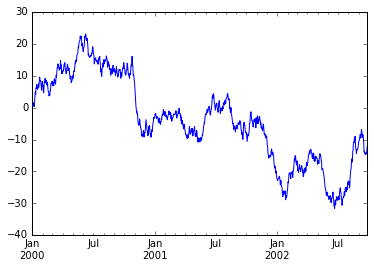

In [45]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
%matplotlib inline
ts.plot()

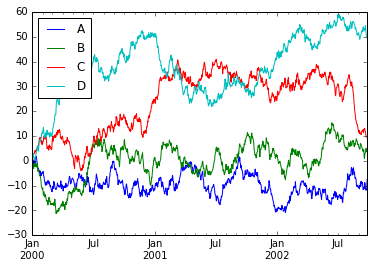

In [46]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
   .....:                   columns=['A', 'B', 'C', 'D'])
   .....: 
df = df.cumsum()
import matplotlib.pyplot as plt
plt.figure(); df.plot(); plt.legend(loc='best')

# Getting data in and out

## CSV

In [47]:
#Writing to a csv file
df.to_csv('foo.csv')

In [48]:
#Reading from a csv file
pd.read_csv('foo.csv')

,Unnamed: 0,A,B,C,D
0,2000-01-01,-0.132008,-0.407705,-1.238131,0.942520
1,2000-01-02,-0.630074,-1.637975,0.384180,2.466032
2,2000-01-03,-0.742629,-1.204263,1.520664,2.985147
3,2000-01-04,0.226728,-2.673852,2.836494,1.912969
4,2000-01-05,-2.144632,-3.126005,2.772338,1.975954
5,2000-01-06,-1.258336,-1.631914,3.056396,1.287534
6,2000-01-07,-0.138305,-1.149034,2.926870,1.084157
7,2000-01-08,-0.103637,-2.117667,3.330944,0.229721
8,2000-01-09,-1.166111,-1.068983,4.204954,0.185753
9,2000-01-10,1.027792,-2.384457,3.896468,1.392990


## HDF5
Reading and writing to HDFStores

In [49]:
#Writing to a HDF5 Store
df.to_hdf('foo.h5','df')

In [50]:
#Reading from a HDF5 Store
pd.read_hdf('foo.h5','df')

,A,B,C,D
2000-01-01,-0.132008,-0.407705,-1.238131,0.942520
2000-01-02,-0.630074,-1.637975,0.384180,2.466032
2000-01-03,-0.742629,-1.204263,1.520664,2.985147
2000-01-04,0.226728,-2.673852,2.836494,1.912969
2000-01-05,-2.144632,-3.126005,2.772338,1.975954
2000-01-06,-1.258336,-1.631914,3.056396,1.287534
2000-01-07,-0.138305,-1.149034,2.926870,1.084157
2000-01-08,-0.103637,-2.117667,3.330944,0.229721
2000-01-09,-1.166111,-1.068983,4.204954,0.185753
2000-01-10,1.027792,-2.384457,3.896468,1.392990


## Excel

In [ ]:
#Writing to an excel file
df.to_excel('foo.xlsx', sheet_name='Sheet1')

In [ ]:
# Reading from an excel file
pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'])